In [1]:
import pyam
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as mtransforms
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from pathlib import Path

<IPython.core.display.Javascript object>

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

Step 1: Read in both dataframes prepared in notebook 105* as well as the dataset prepared in notebook 203*

In [3]:
df_bio = pd.read_csv(
    Path(
        '../data/105_bio_categories.csv'
    ),
    index_col=[0,1]
)

<IPython.core.display.Javascript object>

In [4]:
df_land = pd.read_csv(
    Path(
        '../data/105_land_categories.csv'
    ),
    index_col=[0,1]
)

<IPython.core.display.Javascript object>

In [5]:
df_regional = pd.read_csv(
    Path(
        '../data/203_regional_data_panel_a.csv'
    )
)

<IPython.core.display.Javascript object>

Step 2: Keep only the R5 estimates.

In [6]:
df_bio = df_bio[df_bio['region']!="World"]
df_land = df_land[df_land['region']!="World"]

<IPython.core.display.Javascript object>

Step 3: Make the plot using the bio filters.

In [7]:
region_labels = {
    'R5ASIA':'Asia',
    'R5REF':'Reforming\nEconomies',
    'R5OECD90+EU':'OECD\nand EU',
    'R5MAF':'Middle East\nand Africa',
    'R5LAM':'Latin America\nand Caribbean',
}

<IPython.core.display.Javascript object>

In [8]:
df_bio.loc[:,'region'] = df_bio['region'].map(region_labels)
df_land.loc[:,'region'] = df_land['region'].map(region_labels)

<IPython.core.display.Javascript object>

In [9]:
def make_plot(df, col='category_pe_bio_netzero'):
    fig, ax = plt.subplot_mosaic(
        """
        ab
        cd
        """,
        sharex=True,
        figsize=(18, 10)
    )
    # Step 3.1: Sort the category values
    df_plot = (
        df[
            df['timeframe']=='2020_netzero'
        ]
        .sort_values(by=col)
    )
    if col == 'category_pe_bio_netzero':
        title='Bioenergy demand [EJ/yr]'
    else:
        title='Land cover\nenergy crops [Mha/yr]'
    # Step 3.2: Go through each CDR type amd plot
    for cdr_type in ['novel_cdr', 'conventional_cdr']:
        plot = df_plot[
            df_plot['cdr_type']==cdr_type
        ]
        p = sns.boxplot(
            x='region',
            y='value',
            hue=col,
            data=plot,
            ax=ax['c'] if cdr_type == 'novel_cdr' else ax['d'],
            showfliers=False,
            width=0.6,
            palette=[
                '#5cb4e4',
                '#0773b2',
                '#ee8172'
            ]
        )
        if cdr_type=='novel_cdr':
            counts = df_plot[
                (df_plot['region']=='Asia')
                &
                (df_plot['cdr_type']=='novel_cdr')
            ][col].value_counts()
            display(counts)
            h, l = p.get_legend_handles_labels()
            l_new = [' '.join([x, f'[{str(counts[x])}]']) for x in l]
            ax['c'].legend(h, l_new, title=title, framealpha=0)
            p.set_title('Novel carbon removal', loc='left', weight='bold')
        else:
            p.set_title('Conventional carbon removal on land', loc='left', weight='bold')
        p.set_xlabel('')
        p.xaxis.set_tick_params(rotation=0)
        p.set_ylabel('Cumulative carbon removal between\n2020 and global net zero CO$_2$ [GtCO$_2$]')

    ax['d'].yaxis.set_tick_params(labelbottom=True)
    # Handle grids and annotations for subplots
    for lab,a in ax.items():
        a.grid(alpha=0.2)
        trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
        a.text(0.0, 1.0, lab, transform=a.transAxes + trans,
                va='bottom', weight='bold')
        a.axhline(0, color='black', linewidth=0.5)
    ax['d'].get_legend().remove()
    return fig, ax

<IPython.core.display.Javascript object>

In [10]:
df_regional['variable'].unique()

array(['gross', 'nonco2', 'cdr', 'cdr-land', 'total-gross', 'net',
       'share-grossco2', 'share-nonco2', 'share-land-cdr'], dtype=object)

<IPython.core.display.Javascript object>

In [11]:
vars_to_plot = [
    'total-gross',
    'cdr'
]

<IPython.core.display.Javascript object>

In [12]:
df_regional['region'].unique()

array(['R5ASIA', 'R5LAM', 'R5MAF', 'R5OECD90+EU', 'R5REF', 'World'],
      dtype=object)

<IPython.core.display.Javascript object>

In [13]:
def make_gross_and_cdr_plot(a, timeframe):
    for v in vars_to_plot:
        for i,r in enumerate(['R5ASIA', 'R5LAM', 'R5REF', 'R5MAF', 'R5OECD90+EU']):
            for j,c in enumerate(['C1', 'C2', 'C3']):
                _plot_data = df_regional[
                    (df_regional['region']==r)
                    &
                    (df_regional['variable']==v)
                    &
                    (df_regional['Category']==c)
                    &
                    (df_regional['timeframe']==timeframe)
                ]
                if j == 0:
                    loc=i-0.2
                elif j==1:
                    loc=i
                else:
                    loc=i+0.2
                if v=='total-gross':
                    hatch=None
                    edgecolor=category_color_maps[c]
                else:
                    hatch='///'
                    edgecolor='white'
                a.bar(
                    x=loc,
                    bottom=0,
                    height=_plot_data['Value'].median(),
                    width=0.15,
                    color=category_color_maps[c],
                    hatch=hatch,
                    edgecolor=edgecolor
                )
                a.errorbar(
                    x=[loc, loc],
                    y=[_plot_data['Value'].quantile(0.25), _plot_data['Value'].quantile(0.75)],
                    marker='_',
                    color='black'
                )
    for i,r in enumerate(['R5ASIA', 'R5LAM', 'R5REF', 'R5MAF', 'R5OECD90+EU']):
            for j,c in enumerate(['C1', 'C2', 'C3']):
                if j == 0:
                    loc=i-0.2
                elif j==1:
                    loc=i
                else:
                    loc=i+0.2
                _plot_data = df_regional[
                    (df_regional['region']==r)
                    &
                    (df_regional['variable']=='net')
                    &
                    (df_regional['Category']==c)
                    &
                    (df_regional['timeframe']==timeframe)
                ]['Value'].median()
                a.scatter(
                    loc,
                    _plot_data,
                    color='red',
                    marker='^'
                )

<IPython.core.display.Javascript object>

In [14]:
category_color_maps = {
    'C1':'#4dbdab',
    'C2':'#83d0e2',
    'C3':'#7688ab'
}

<IPython.core.display.Javascript object>

In [15]:
labels = {
    'C1':'C1: limit warming to 1.5°C (>50%) with no or limited overshoot',
    'C2':'C2: return warming to 1.5°C (>50%) after high overshoot',
    'C3':'C3: limit warming to 2°C (>67%)'
}

<IPython.core.display.Javascript object>

In [16]:
font = {
    'size':12,
    'family':'sans-serif',
    'sans-serif':'Arial'
}
plt.rc(
    'font', **font,
)

<IPython.core.display.Javascript object>

100-200    245
0-100      101
200+        54
Name: category_pe_bio_netzero, dtype: int64

(-30.0, 200.0)

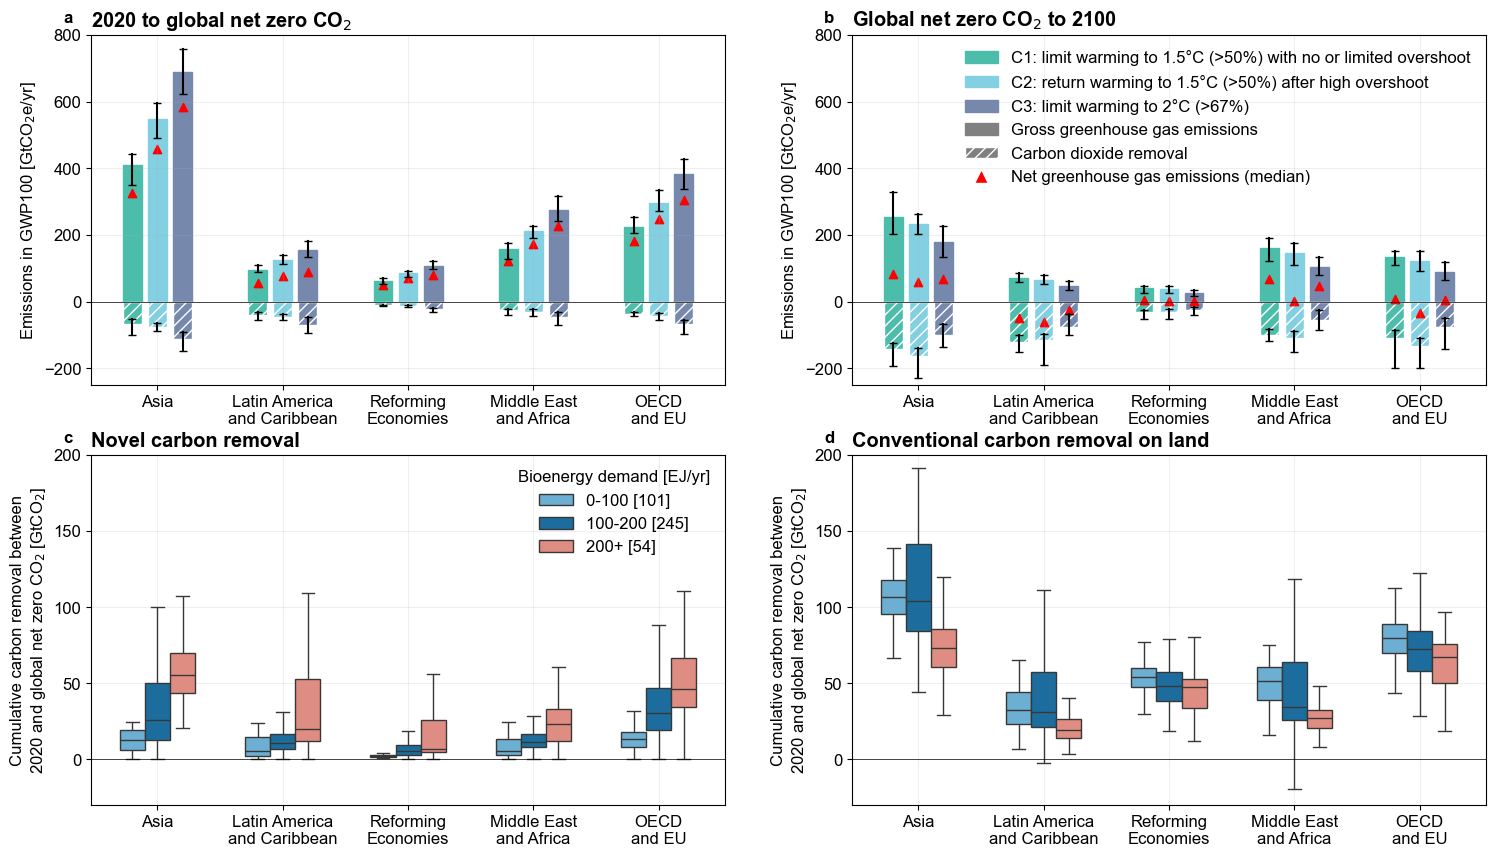

<IPython.core.display.Javascript object>

In [17]:
fig, ax = make_plot(df_bio)
# Plot the gross emissions and CDR
make_gross_and_cdr_plot(ax['a'], '2020-netzero')
make_gross_and_cdr_plot(ax['b'], 'netzero-2100')
ax['a'].set_ylim(-250, 800)
ax['b'].set_ylim(-250, 800)
# Make legend for panel a and b
legend_handles = [
    Patch(facecolor=category_color_maps[x], edgecolor=category_color_maps[x], label=labels[x]) for x in ['C1', 'C2', 'C3']
]
legend_handles.append(Patch(facecolor='grey', edgecolor='grey', label='Gross greenhouse gas emissions'))
legend_handles.append(Patch(facecolor='grey', edgecolor='white', hatch='///', label='Carbon dioxide removal'))
legend_handles.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='red', markersize=10, label='Net greenhouse gas emissions (median)'))
ax['a'].xaxis.set_tick_params(labelbottom=True)
ax['b'].xaxis.set_tick_params(labelbottom=True)
for a in [ax['a'], ax['b']]:
    a.set_ylabel('Emissions in GWP100 [GtCO$_2$e/yr]')
ax['b'].legend(handles=legend_handles, framealpha=0)
ax['a'].set_title('2020 to global net zero CO$_2$', loc='left', weight='bold')
ax['b'].set_title('Global net zero CO$_2$ to 2100', loc='left', weight='bold')
# Make sure b and c are aligned in terms of axes
ax['c'].set_ylim(-30, 200)
ax['d'].set_ylim(-30, 200)

In [18]:
fig.savefig(
    Path(
        'figures/Figure2.png'
    ),
    dpi=400,
    bbox_inches='tight'
)

<IPython.core.display.Javascript object>